In [2]:
import numpy as np 
import numpy.random as random 
import scipy as sp 
from pandas import Series,DataFrame 
import pandas as pd 

import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 
%matplotlib inline 

import sklearn 

%precision 3

import requests,zipfile 
import io 

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

data = pd.read_csv(io.StringIO(res.decode('utf-8')),header = None)

data.columns =['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style'
              ,'drive-wheels','engine-location','wheel-base','length','width','height',
              'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
              'horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [3]:
data= data[['price','length','engine-size']]
data.isin(['?']).sum()

price          4
length         0
engine-size    0
dtype: int64

In [4]:
data = data.replace('?',np.nan).dropna()
print(data.shape)

(201, 3)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 3 columns):
price          201 non-null object
length         201 non-null float64
engine-size    201 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.3+ KB


In [8]:
data = data.assign(price = pd.to_numeric(data.price))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 3 columns):
price          201 non-null int64
length         201 non-null float64
engine-size    201 non-null int64
dtypes: float64(1), int64(2)
memory usage: 6.3 KB


In [9]:
#dataに一つでも欠損値が含まれているのかを返すメソッド
print(data.isnull().any())

price          False
length         False
engine-size    False
dtype: bool


In [10]:
print(data.isnull().sum())
print(data['price'].mean())
print(data['price'].var())

price          0
length         0
engine-size    0
dtype: int64
13207.129353233831
63155863.443184026


In [12]:
data.corr()

,price,length,engine-size
price,1.000000,0.690628,0.872335
length,0.690628,1.000000,0.685025
engine-size,0.872335,0.685025,1.000000


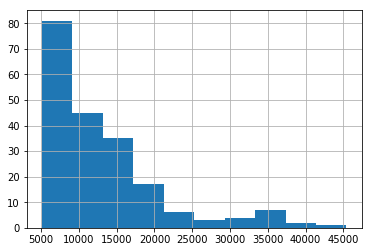

In [13]:
import matplotlib.pyplot as plt 
plt.hist(data['price'])
plt.grid(True)

{'whiskers': [<matplotlib.lines.Line2D at 0x266aa4479e8>,
 'caps': [<matplotlib.lines.Line2D at 0x266aa447e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x266aa4475f8>,
 'medians': [<matplotlib.lines.Line2D at 0x266aa456748>,
 'fliers': [<matplotlib.lines.Line2D at 0x266aa456a90>,
 'means': []}

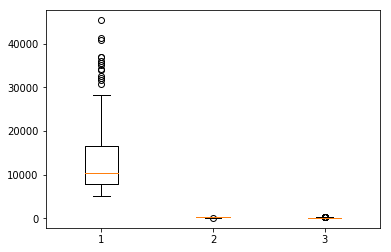

In [14]:
plt.boxplot([data['price'],data['length'],data['engine-size']])

In [17]:
#データ分割のためのインポート
from sklearn.model_selection import train_test_split 

#重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression 

#目的変数　今回はpriceを設定
y=data['price']

#説明変数にそれ以外を設定
X =data.drop('price',axis = 1)

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.5,random_state =0)

#重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)


#目的変数　今回はpriceを設定
y=data['price']

#説明変数にそれ以外を設定
X =data.drop('price',axis = 1)

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.5,random_state =0)

#重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#決定係数の表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

決定係数(train):0.771
決定係数(test):0.763


In [19]:
#回帰係数
pd.Series(model.coef_,index=X.columns)

length         179.544547
engine-size    120.273905
dtype: float64

In [20]:
#切片の表示
model.intercept_

-33590.41099160761